In [3]:
#Librairies générales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

#Librairies régression logistique binomiale et multinomiale
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from sklearn.model_selection import train_test_split

#Librairies régression logistique ordinale
import mord as md

#Librairie annexe
import warnings
warnings.filterwarnings('ignore')

## La fonction logistique

In [6]:
x = np.arange(-10., 10., 0.5)#Définiion de l'intervalle de valeurs

def logistic(x):
    tab = []#Création tableau vide de valeurs
    for i in x : 
        tab.append(1/(1 + np.exp(-i)))#Ajout des valeurs calculées
    return tab

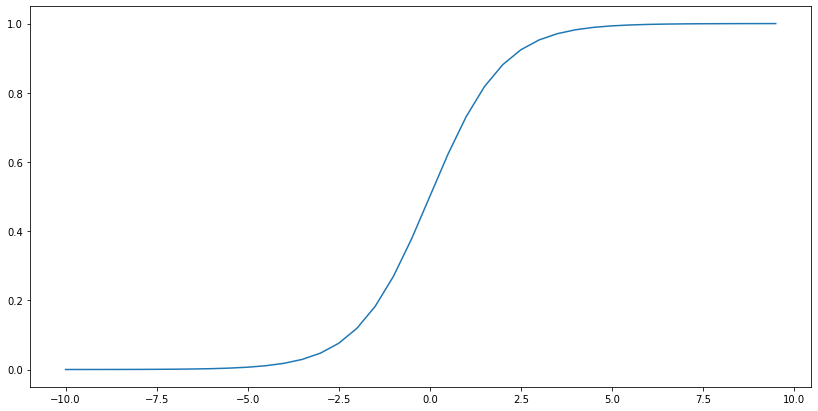

In [7]:
sig = logistic(x)#Calcul des valeurs 

plt.figure(figsize=(14,7))
plt.plot(x,sig)
plt.show()

## Les frontières de décision

Le but de cette opération est de visualiser le moment de prise de décision par le classifieur. Pour cela on va utiliser le dataset de détection de fraude, en ne essayant de voir à quel moment le modèle considère une situation de fraude, en fonction d'une variable : Audit risk.

### Importation des données

In [8]:
data = pd.read_csv('audit_risk.csv', sep=',')
data = data.dropna(axis=1)#Suppression des valeurs manquantes
data = data.drop(columns=['LOCATION_ID'])#Suppression de variable contenant des valeurs qualitatives

### Découpe du dataset

In [9]:
X = data.drop(columns=['Risk'])#Définition des variables explicatives
y = data['Risk']#Définition de la variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)#On met 20% des données dans le set de test

### Construction de la frontière

In [10]:
X = data.drop(columns=['Risk'])#Définition des variables qualitatives
X = X.iloc[:, 23:]#On récupère la dernière variable et ses valeurs
y = (data['Risk']==0).astype(np.int)#1 s'il n'y a pas fraude, 0 sinon

In [11]:
log_reg = LogisticRegression()#Déclaration du classifieur
log_reg.fit(X,y)#Entrainement

LogisticRegression()

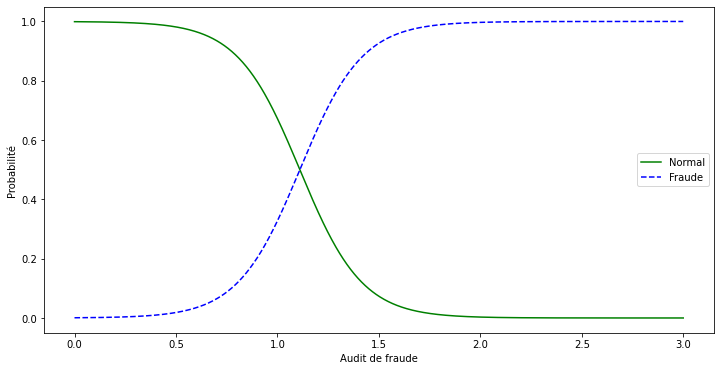

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)#Création de nouvelles données d'audit de risque entre o et 3, pour visualiser la prise de décision
y_proba = log_reg.predict_proba(X_new)#Calcul des probabilités d'appartenance aux situations normales

plt.figure(figsize=(12,6))
plt.plot(X_new, y_proba[:, 1], "g-", label='Normal')
plt.plot(X_new, y_proba[:, 0], "b--", label='Fraude')
plt.xlabel('Audit de fraude')
plt.ylabel('Probabilité')
plt.legend()
plt.show()

## Modèle de prédiction : Régression logistique

### Estimateur

In [13]:
model = LogisticRegression(solver='liblinear').fit(X_train,y_train)#Entrainement de l'estimateur avec solver='liblinear' car il est plus adapté aux petits datasets
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance

### Evaluation de l'estimation

In [14]:
print(confusion_matrix(y_test, y_pred))#Matrice de confusion
print(classification_report(y_test, y_pred))#Résumé des résultats de classification
print('Perte logistique :', log_loss(y_test, y_prob))#Calcul de la perte logistique, métrique importante de la régression logistique. Plus elle est petite, meilleure sont les prédictions

[[102   0]
 [  2  52]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      0.96      0.98        54

    accuracy                           0.99       156
   macro avg       0.99      0.98      0.99       156
weighted avg       0.99      0.99      0.99       156

Perte logistique : 0.030574243205401464


### Régularisation

In [15]:
model = LogisticRegression(solver='liblinear',C=.05, penalty='l2').fit(X_train,y_train)#Entrainement de l'estimateur
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance

In [16]:
print(confusion_matrix(y_test, y_pred))#Matrice de confusion
print(classification_report(y_test, y_pred))#Résumé des résultats de classification
print('Perte logistique :', log_loss(y_test, y_prob))#Calcul de la perte logistique, métrique importante de la régression logistique. Plus elle est petite, meilleure sont les prédictions

[[102   0]
 [  2  52]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      0.96      0.98        54

    accuracy                           0.99       156
   macro avg       0.99      0.98      0.99       156
weighted avg       0.99      0.99      0.99       156

Perte logistique : 0.07711716305765584


## Modèle de prédiction : Régression softmax

### Importation des données

In [17]:
url = 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'
data = pd.read_csv(url, error_bad_lines=False, sep =",")

### Sauvegarde des données

Enregistrement des données dans un fichier csv

In [18]:
data.to_csv("wine_data.csv",sep = ",",encoding="utf-8", index=False)

### Découpe du dataset

In [18]:
X = data.drop(columns=['Wine'])#Définition des variables explicatives
y = data['Wine']#Définition variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)#On met 20% des données dans le set de test

## Modèle de prédiction

In [19]:
model = LogisticRegression(solver = 'newton-cg',multi_class = "multinomial", penalty = 'l2', C = 0.6000000000000001).fit(X_train,y_train)#Entrainement de l'estimateur
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance

In [20]:
print(confusion_matrix(y_test, y_pred))#Matrice de confusion
print(classification_report(y_test, y_pred))#Résumé des résultats de classification
print('Perte logistique :', log_loss(y_test, y_prob))#Calcul de la perte logistique, métrique importante de la régression logistique. Plus elle est petite, meilleure sont les prédictions

[[ 7  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.94      1.00      0.97        17
           3       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Perte logistique : 0.057817184775631976


## Modèle de prédiction : Régression logistique ordinale

In [21]:
model = md.LogisticAT(alpha=0).fit(X_train, y_train)#Entrainement du modèle, en précisant alpha=0 pour ne pas inclure de régularisation
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance 

In [22]:
print(confusion_matrix(y_test, y_pred))#Matrice de confusion
print(classification_report(y_test, y_pred))#Résumé des résultats de classification
print('Perte logistique :', log_loss(y_test, y_prob))#Calcul de la perte logistique, métrique importante de la régression logistique. Plus elle est petite, meilleure sont les prédictions

[[ 7  0  0]
 [ 2 15  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       1.00      0.88      0.94        17
           3       1.00      1.00      1.00        12

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36

Perte logistique : 0.24088321068816482


## Calcul des temps d'exécution

### Importation du dataset

Importation des données MNIST en utilisant 30.000 obsevations parmi les 60.000 disponibles.

In [23]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

In [24]:
X_train, X_test, y_train, y_test = X[:30000], X[30000:], y[:30000], y[30000:]

In [25]:
start = time.time()
model = LogisticRegression(solver='newton-cg').fit(X_train,y_train)#Entrainement de l'estimateur
end = time.time()
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance
print(end - start)

1124.241402387619


In [26]:
start = time.time()
model = LogisticRegression(solver='lbfgs').fit(X_train,y_train)#Entrainement de l'estimateur
end = time.time()
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance
print(end - start)

13.48697829246521


In [27]:
start = time.time()
model = LogisticRegression(solver='liblinear').fit(X_train,y_train)#Entrainement de l'estimateur
end = time.time()
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance
print(end - start)

1581.7946212291718


In [28]:
start = time.time()
model = LogisticRegression(solver='sag').fit(X_train,y_train)#Entrainement de l'estimateur
end = time.time()
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance
print(end - start)

82.45163559913635


In [29]:
start = time.time()
model = LogisticRegression(solver='saga').fit(X_train,y_train)#Entrainement de l'estimateur
end = time.time()
y_pred = model.predict(X_test)#Prédiction sur les données X
y_prob = model.predict_proba(X_test)#Prédiction des probabilités d'appartenance
print(end - start)

110.30542612075806
